# Практическое занятие №3

П.Н. Советов, РТУ МИРЭА

In [46]:
import matplotlib as plt

## Часть 1

Привести примеры кода, которые соответствуют следующим нарушениям PEP 8:

1. whitespace before '('.
1. missing whitespace around operator.
1. missing whitespace after ','.
1. unexpected spaces around keyword / parameter equals.
1. expected 2 blank lines, found 1.
1. multiple statements on one line (colon).
1. multiple statements on one line (semicolon).
1. comparison to None should be 'if cond is None:'.
1. comparison to True should be 'if cond is True:' or 'if cond:'.

Для быстрой проверки используйте сайт [pep8online.com](http://pep8online.com).

### Пример 1

In [1]:
def foo (x):
    return x * x

### Пример 2

In [48]:
def foo(x):
    return x *x

### Пример 3

In [49]:
def foo(x,y):
    return x * y

### Пример 4

In [50]:
def foo(x, y):
    return x * y
foo(x = 4, y = 5)

20

### Пример 5

In [51]:
def foo2(x):
    return x * x

def foo3(x):
    return x * x * x


### Пример 6

In [52]:
x = 4
if x == 4: x = 5

### Пример 7

In [53]:
x = 5; y = 6

### Пример 8

In [54]:
x = 6
if x == None:
    x = 7

### Пример 9

In [55]:
x = False
if x == True:
    x = False

Неконтролируемый импорт с помощью `*`, как известно, в Питоне не поощряется. Попробуйте сделать его контролируемым со стороны модуля. Чтобы использование звездочки приводило к импорту пользователю только определенного круга имен вашего модуля.

In [2]:
from math import sin, pi

a = sin(pi / 2)

Создать учебный пакет, состоящий из нескольких модулей и JSON-файла. Получить дистрибутив, готовый для установки с помощью pip. Проверить результат установки в виртуальном окружении.

Написать функцию, которая добавляет информацию о возникшем исключении (класс, сообщение, трассировка) в лог-файл. Функция не должна обрабатывать исключения. На вход функции, которую необходимо разработать, поступает ссылка на выполняемую пользовательскую функцию:

```Python
def run_with_log(func):
    try:
        func()
    except Exception as e:
        with open('errors.log', 'w') as f:
            f.write(str(e) + '\n')
```

Реализовать модель сегрегации Шеллинга в Matplotlib. На двумерной сетке находятся агенты двух групп. На каждой клетке может находиться не более 1 агента. Агент "счастлив", если, как минимум, заданный процент ближайших соседей относится к его группе. В противном случае агент переезжает на иное, свободное место.

Ввести следующие параметры: размер популяции, размеры сетки, процентное соотношение агентов двух групп, пороговое значение "толерантности", количество шагов моделирования.

1. Реализовать отображение агентов в виде квадратов двух цветов на целочисленной сетке.
1. Случайно разместить агентов, учитывая запрет на совпадение координат.
1. Реализовать функцию `distance` на основе метрики манхэттенского расстояния.
1. Реализовать функцию `is_happy`.
1. Изобразить график исходного расположения агентов и график расположения спустя N шагов моделирования.
1. Изобразить график изменения состояния "настроения" агентов.
1. (повышенной сложности) Реализовать анимацию шагов моделирования.

## Часть 2

В следующих задачах визуализация данных используется для нахождения ответов на простые вопросы. В каждом конкретном случае необходимо предложить предпочтительный метод визуализации в Matplotlib. Приветствуются идеи для обнаружения новых фактов из данных.

Проанализировать данные, полученные от почтового робота:

In [56]:
import json
import email.utils
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt
import matplotlib.cm as cm

with open('pract3/table.json', encoding='utf8') as f:
    table = json.loads(f.read()) # Таблица решений задач
    
with open('pract3/failed.json', encoding='utf8') as f:
    failed = json.loads(f.read()) # Данные по ошибкам
    
with open('pract3/messages.json', encoding='utf8') as f:
    messages = json.loads(f.read()) # Полученные сообщения


### Вопрос 1

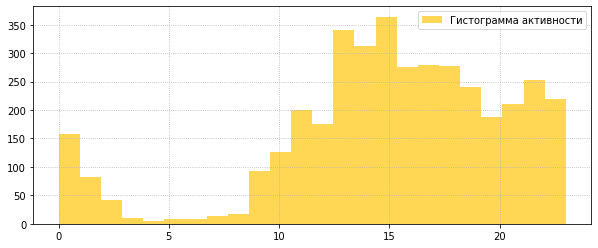

In [57]:
new_messages = [(m['subj'].upper(), email.utils.parsedate(m['date'])) for m in messages]

times = np.array([x[1][3] for x in new_messages]) # numpy массив с данными о времени отправок

plt.figure(figsize=(10, 4)) # создали фигуру для графика и задали размер

plt.hist(
    times, # данные
    bins=24, # количесво столбиков
    density=False, # настройки оси y
    alpha=0.7, # прозрачность
    color='#ffc60d', # Цвет
    label='Гистограмма активности' # Название в легенде
)

plt.legend()
plt.grid(linestyle=':') # сетка, : - чтобы линии были не очень грубыми.
plt.show() # отображает график

После построения гистограммы можно сказать что пользователи найболее активны днем, когда вернулись из института. Либо поздно вечером, в связи с тем что дедлайны чаще всего к ночи.

### Вопрос 2

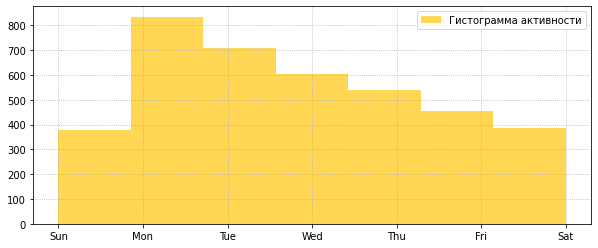

In [58]:

def get_day(m):
    data = m.split(' ')
    return data[0][:len(data[0]) - 1]

days = np.array([ get_day(m['date']) for m in messages]) # numpy массив с данными о днях недели отправок
plt.figure(figsize=(10, 4)) # создали фигуру для графика и задали размер

plt.hist(
    days, # данные
    bins=7, # количесво столбиков (7 дней недели)
    density=False, # настройки оси y
    alpha=0.7, # прозрачность
    color='#ffc60d', # Цвет
    label='Гистограмма активности' # Название в легенде
)

plt.legend()
plt.grid(linestyle=':') # сетка, : - чтобы линии были не очень грубыми.
plt.show() # отображает график

Чаще всего решения отправляют в понедельник

### Вопрос 3

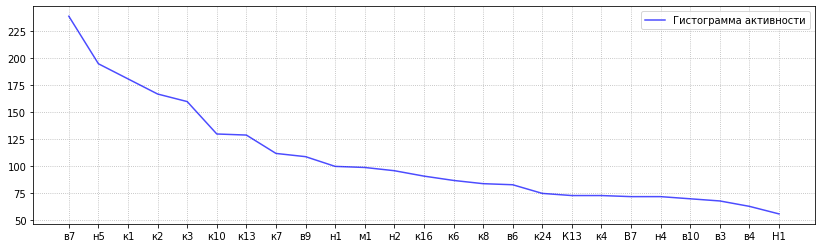

In [62]:

def get_group(m):
    gr = m.split(' ')
    return gr[0]

groups = [get_group(m['subj']) for m in messages] # numpy массив с данными о днях недели отправок
counts = {}

for g in groups:
    if g in counts:
        counts[g] += 1
    else:
        counts[g] = 1

plt.figure(figsize=(14, 4)) # создали фигуру для графика и задали размер

items = [(x, y) for x, y in counts.items()]
items.sort(key = lambda x: -x[1]) 
items = items[0:25] # топ 25

plt.plot(
    [group[0] for group in items], # Группа
    [group[1] for group in items], # количество
    alpha=0.7, # прозрачность
    color='blue', # Цвет
    label='Гистограмма активности' # Название в легенде
)

plt.legend()
plt.grid(linestyle=':') # сетка, : - чтобы линии были не очень грубыми.
plt.show() # отображает график

Построили график для топ 25 групп. Чаще всего отправляла решения группа "в7"

С помощью графиков ответить на следующие вопросы:

1. Как по времени суток распределяется активность студентов?
1. Как по дням недели распределяется активность студентов?
1. В каких группах было отправлено больше всего сообщений?
1. В каких группах было получено больше всего правильных решений?
1. Какие задачи оказались самыми легкими, самыми сложными?
1. Какие распространенные ошибки совершали студенты?

Проанализировать [базу данных](https://github.com/Newbilius/Old-Games_DOS_Game_Gauntlet/blob/master/GAMES.csv) старых компьютерных игр.

С помощью графиков ответить на следующие вопросы:
1. Какие годы были самыми популярными с точки зрения выхода игр?
1. Какие жанры были популярны в различные периоды времени?

Проверить с помощью собственных графиков результаты, полученные в [Python Developers Survey 2019 Results](https://www.jetbrains.com/lp/python-developers-survey-2019/). Исходные данные находятся [здесь](https://drive.google.com/drive/folders/1GW86M_QLFOA2KyeWeb8hzBj_RqQIXmAU).